In [3]:
import glob

edf_files = glob.glob("*.edf")

In [4]:
edf_files

['test_2_EPOCX_188655_2023.08.01T21.26.18+09.00.edf',
 'test_EPOCX_188655_2023.07.13T21.39.42+09.00.edf',
 'test_EPOCX_188655_2023.07.13T21.39.42+09.00.md.edf',
 'test_1_EPOCX_188655_2023.08.01T20.44.56+09.00.edf']

In [4]:
from pyedflib import highlevel

# channels = ["AFS3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"]
channels = ['TIME_STAMP_S', 'TIME_STAMP_MS', 'OR_TIME_STAMP_S', 'OR_TIME_STAMP_MS', 'COUNTER', 'INTERPOLATED', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'RAW_CQ', 'BATTERY', 'BATTERY_PERCENT', 'MARKERINDEX', 'MARKERTYPE', 'MARKERVALUEINT', 'MARKER_HARDWARE', 'CQ_AF3', 'CQ_F7', 'CQ_F3', 'CQ_FC5', 'CQ_T7', 'CQ_P7', 'CQ_O1', 'CQ_O2', 'CQ_P8', 'CQ_T8', 'CQ_FC6', 'CQ_F4', 'CQ_F8', 'CQ_AF4', 'CQ_OVERALL', 'EQ_SAMPLERATEQUA', 'EQ_OVERALL', 'EQ_AF3', 'EQ_F7', 'EQ_F3', 'EQ_FC5', 'EQ_T7', 'EQ_P7', 'EQ_O1', 'EQ_O2', 'EQ_P8', 'EQ_T8', 'EQ_FC6', 'EQ_F4', 'EQ_F8', 'EQ_AF4', 'CQ_CMS', 'CQ_DRL']
signals, signal_headers, header = highlevel.read_edf(edf_files[0], ch_names=channels)

In [5]:
import mne
data = mne.io.read_raw_edf(edf_files[0])
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info    
channels = data.ch_names

Extracting EDF parameters from /Users/yoonseonghyeon/Desktop/Brainstormers/test_2_EPOCX_188655_2023.08.01T21.26.18+09.00.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: TIME_STAMP_s, TIME_STAMP_ms, OR_TIME_STAMP_s, OR_TIME_STAMP_ms, ...
 chs: 60 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: 2023-08-01 21:26:18 UTC
 nchan: 60
 projs: []
 sfreq: 128.0 Hz
>

In [60]:
type(raw_data)

numpy.ndarray

In [61]:
raw_data.shape

(60, 7552)

In [63]:
channels, len(channels)

(['TIME_STAMP_s',
  'TIME_STAMP_ms',
  'OR_TIME_STAMP_s',
  'OR_TIME_STAMP_ms',
  'COUNTER',
  'INTERPOLATED',
  'AF3',
  'F7',
  'F3',
  'FC5',
  'T7',
  'P7',
  'O1',
  'O2',
  'P8',
  'T8',
  'FC6',
  'F4',
  'F8',
  'AF4',
  'RAW_CQ',
  'BATTERY',
  'BATTERY_PERCENT',
  'MarkerIndex',
  'MarkerType',
  'MarkerValueInt',
  'MARKER_HARDWARE',
  'CQ_AF3',
  'CQ_F7',
  'CQ_F3',
  'CQ_FC5',
  'CQ_T7',
  'CQ_P7',
  'CQ_O1',
  'CQ_O2',
  'CQ_P8',
  'CQ_T8',
  'CQ_FC6',
  'CQ_F4',
  'CQ_F8',
  'CQ_AF4',
  'CQ_Overall',
  'EQ_SampleRateQua',
  'EQ_OVERALL',
  'EQ_AF3',
  'EQ_F7',
  'EQ_F3',
  'EQ_FC5',
  'EQ_T7',
  'EQ_P7',
  'EQ_O1',
  'EQ_O2',
  'EQ_P8',
  'EQ_T8',
  'EQ_FC6',
  'EQ_F4',
  'EQ_F8',
  'EQ_AF4',
  'CQ_CMS',
  'CQ_DRL'],
 60)

In [7]:
roi_channels = """AF3
F7
F3
FC5
T7
P7
O1
O2
P8
T8
FC6
F4
F8
AF4""".split("\n")

print(roi_channels)

roi_idxes = [channels.index(c) for c in roi_channels]
roi_idxes

['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']


[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [8]:
roi_data = raw_data[roi_idxes, :]

In [9]:
roi_data.shape

(14, 107008)

In [34]:
r.shape

(107008,)

In [35]:
specific_timestamp = roi_data[:, r]

In [53]:
specific_timestamp.shape

(14, 768)

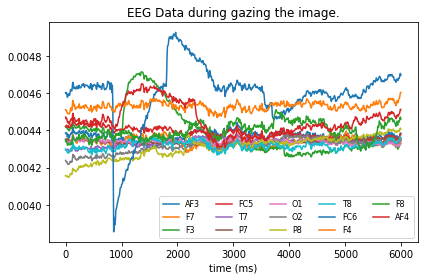

In [77]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, specific_timestamp.shape[-1]*1000/128, 1000/128)

for i in range(specific_timestamp.shape[0]):
    temp_y = specific_timestamp[i]
    plt.plot(x, temp_y, label=roi_channels[i])

plt.title('EEG Data during gazing the image.')
plt.xlabel('time (ms)')
plt.legend(loc='lower right', ncol=5, fontsize=8)

plt.tight_layout()
plt.savefig('gazing_eeg_data_example.png', dpi=400)

In [16]:
s_timestamp = raw_data[0, :]
ms_timestamp = raw_data[1, :]

In [17]:
s_timestamp[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
s_timestamp[:258]

array([0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
      

In [26]:
r = ((s_timestamp*1000000 + ms_timestamp*1000)>=1) * ((s_timestamp*1000000 + ms_timestamp*1000)<=7)

In [38]:
r.shape

(107008,)

In [155]:
roi_data[:, :500][:, r].shape

(14, 256)

In [89]:
data = roi_data[:, 0]
data

array([0.00443795, 0.0044    , 0.00439128, 0.00444051, 0.00440872,
       0.00441846, 0.00444564, 0.00442974, 0.00440256, 0.00440205,
       0.00464615, 0.00460872, 0.00459026, 0.00459641])

In [105]:
timestamp > 1

array([False, False, False, ..., False, False, False])

In [90]:
from scipy.signal import spectrogram
from matplotlib.pyplot import specgram

raw = spectrogram(roi_data, fs=125, noverlap=1)[2]

array([[[6.52609051e-12, 7.75383983e-11, 1.48843713e-10, ...,
         1.67051675e-12, 7.77060237e-13, 6.36691502e-11],
        [2.19494097e-10, 5.88845230e-11, 8.47721420e-10, ...,
         2.14443870e-09, 2.13032719e-11, 1.46743428e-09],
        [1.23982268e-09, 2.65757880e-12, 4.15584787e-11, ...,
         2.03373078e-09, 4.77033107e-12, 1.79276758e-09],
        ...,
        [1.41167040e-16, 1.81919828e-15, 7.75526107e-16, ...,
         3.93639559e-16, 4.07370176e-16, 4.99882634e-17],
        [8.85993193e-16, 5.75463789e-16, 1.56561507e-16, ...,
         2.31516090e-16, 1.82261151e-15, 5.45528620e-18],
        [2.36341248e-18, 4.67682344e-16, 2.47262627e-16, ...,
         2.12609762e-16, 5.07801248e-17, 5.74851747e-17]],

       [[1.49730418e-11, 1.43414770e-11, 1.06839089e-11, ...,
         3.27643379e-14, 9.05110379e-13, 2.02482603e-11],
        [1.37541063e-09, 1.58196795e-09, 3.04121598e-10, ...,
         4.51735321e-10, 5.68133325e-11, 2.71326946e-10],
        [3.43860292e-12, 

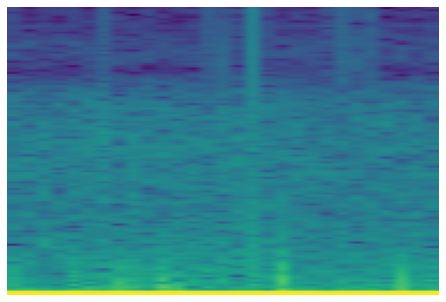

In [102]:
import matplotlib
import matplotlib.pyplot as plt


for i in range(roi_data.shape[0]):
    im = specgram(roi_data[i, :], Fs=125, noverlap=1)[3]
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
    plt.savefig(f"image_{i}th_channel.png", bbox_inches = 'tight',
    pad_inches = 0)

In [7]:
import pandas as pd

In [35]:
data = pd.read_csv("./test_EPOCX_188655_2023.07.13T21.39.42+09.00.md.csv", sep=",")

In [36]:
data.head(10)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,title:test,start timestamp:1689251982.047112,stop timestamp:1689252058.536061,headset type:EPOCX,headset serial:E5020228,headset firmware:720,channels:67,sampling rate:eeg_128;mot_32,samples:7600,version:2.2,
Timestamp,OriginalTimestamp,EEG.Counter,EEG.Interpolated,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4,EEG.RawCq,EEG.Battery,EEG.BatteryPercent,MarkerIndex,MarkerType,MarkerValueInt,EEG.MarkerHardware,CQ.AF3,CQ.F7,CQ.F3,CQ.FC5,CQ.T7,CQ.P7,CQ.O1,CQ.O2,CQ.P8,CQ.T8,CQ.FC6,CQ.F4,CQ.F8,CQ.AF4,CQ.Overall,EQ.SampleRateQuality,EQ.OVERALL,EQ.AF3,EQ.F7,EQ.F3,EQ.FC5,EQ.T7,EQ.P7,EQ.O1,EQ.O2,EQ.P8,EQ.T8,EQ.FC6,EQ.F4,EQ.F8,EQ.AF4,MOT.CounterMems,MOT.InterpolatedMems,MOT.Q0,MOT.Q1,MOT.Q2,MOT.Q3,MOT.AccX,MOT.AccY,MOT.AccZ,MOT.MagX,MOT.MagY,MOT.MagZ
1689251982.047112,1689251982.047503,69.000000,0.000000,4437.820313,4400.128418,4391.153809,4440.256348,4408.974121,4418.461426,4445.769043,4429.615234,4402.307617,4402.179688,4645.897461,4608.846191,4590.384766,4596.538574,5016.000000,2.000000,46.000000,NaN,NaN,NaN,0.000000,4.000000,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,66.666664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1689251982.054920,1689251982.055211,70.000000,0.000000,4438.717773,4405.769043,4394.871582,4437.692383,4412.307617,4422.179688,4445.128418,4429.615234,4401.153809,4391.153809,4648.077148,4607.563965,4594.230957,4597.948730,5198.000000,2.000000,46.000000,NaN,NaN,NaN,0.000000,4.000000,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,66.666664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1689251982.062728,1689251982.063119,71.000000,0.000000,4432.948730,4401.666504,4393.717773,4429.230957,4412.948730,4424.487305,4448.333496,4430.000000,4402.692383,4361.922852,4648.717773,4607.307617,4583.717773,4591.794922,4236.000000,2.000000,46.000000,NaN,NaN,NaN,0.000000,4.000000,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,66.666664,1.000000,16.666666,4.000000,4.000000,0.000000,4.000000,1.000000,3.000000,1.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1689251982.070537,1689251982.070927,72.000000,0.000000,4431.153809,4399.871582,4393.846191,4435.641113,4416.282227,4426.282227,4454.358887,4432.820313,4404.102539,4385.897461,4641.538574,4608.846191,4573.589844,4588.077148,3535.000000,2.000000,46.000000,NaN,NaN,NaN,0.000000,4.000000,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,66.666664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,0.000000,0.690993,-0.538940,-0.439880,-0.196411,0.803809,-0.573312,0.028324,-26.656399,-63.463982,6.673175
1689251982.078344,1689251982.078835,73.000000,0.000000,4435.384766,4404.743652,4386.025879,4446.794922,4420.256348,4421.666504,4450.256348,4433.205078,4404.615234,4402.436035,4638.717773,4611.538574,4578.589844,4594.871582,5273.000000,2.000000,46.000000,NaN,NaN,NaN,0.000000,4.000000,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,66.666664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1689251982.086153,1689251982.086643,74.000000,0.000000,4436.538574,4407.051270,4386.282227,4441.538574,4411.666504,4412.051270,4440.256348,4426.153809,4402.820313,4380.000000,4640.256348,4608.717773,4581.666504,4596.025879,6077.000000,2.000000,46.000000,NaN,NaN,NaN,0.000000,4.000000,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,

In [43]:
d = data.iloc[:, 0]

In [47]:
d.keys()

MultiIndex([(        'Timestamp', 'OriginalTimestamp', 'EEG.Counter', ...),
            ('1689251982.047112', '1689251982.047503',   '69.000000', ...),
            ('1689251982.054920', '1689251982.055211',   '70.000000', ...),
            ('1689251982.062728', '1689251982.063119',   '71.000000', ...),
            ('1689251982.070537', '1689251982.070927',   '72.000000', ...),
            ('1689251982.078344', '1689251982.078835',   '73.000000', ...),
            ('1689251982.086153', '1689251982.086643',   '74.000000', ...),
            ('1689251982.093961', '1689251982.094551',   '75.000000', ...),
            ('1689251982.101769', '1689251982.102459',   '76.000000', ...),
            ('1689251982.109577', '1689251982.110266',   '77.000000', ...),
            ...
            ('1689252058.465788', '1689252058.466876',    '0.000000', ...),
            ('1689252058.473596', '1689252058.474684',    '1.000000', ...),
            ('1689252058.481404', '1689252058.482592',    '2.000000', ..

In [48]:
d["Timestamp"]

OriginalTimestamp  EEG.Counter  EEG.Interpolated  EEG.AF3  EEG.F7  EEG.F3  EEG.FC5  EEG.T7  EEG.P7  EEG.O1  EEG.O2  EEG.P8  EEG.T8  EEG.FC6  EEG.F4  EEG.F8  EEG.AF4  EEG.RawCq  EEG.Battery  EEG.BatteryPercent  MarkerIndex  MarkerType  MarkerValueInt  EEG.MarkerHardware  CQ.AF3  CQ.F7  CQ.F3  CQ.FC5  CQ.T7  CQ.P7  CQ.O1  CQ.O2  CQ.P8  CQ.T8  CQ.FC6  CQ.F4  CQ.F8  CQ.AF4  CQ.Overall  EQ.SampleRateQuality  EQ.OVERALL  EQ.AF3  EQ.F7  EQ.F3  EQ.FC5  EQ.T7  EQ.P7  EQ.O1  EQ.O2  EQ.P8  EQ.T8  EQ.FC6  EQ.F4  EQ.F8  EQ.AF4  MOT.CounterMems    MOT.InterpolatedMems
Name: title:test, dtype: object

In [5]:
import numpy as np
from PIL import Image

im = Image.open("./dataset/33489_c_0.png")

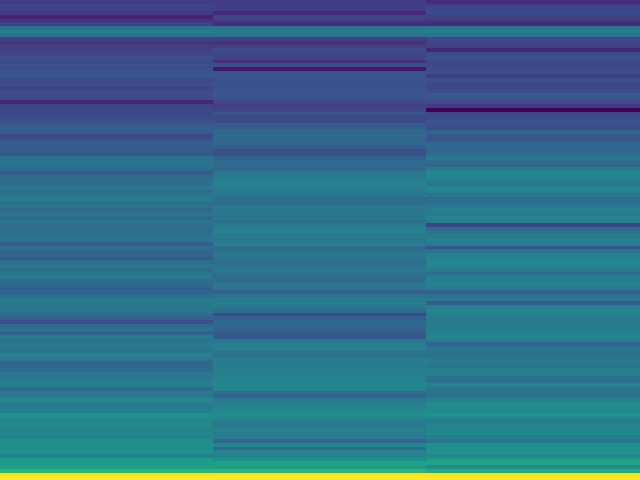

In [6]:
im

In [8]:
im.size

(640, 480)

In [10]:
from braincoder.helper import text2emb, prepare_text_embedding

2023-09-17 18:01:25.335455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [13]:
tokenizer, text_encoder = prepare_text_embedding("cpu")

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.9.mlp.fc1.bias', 'vision_model.encoder.layers.5.self_attn.out_proj.bias', 'vision_model.encoder.layers.15.layer_norm1.bias', 'vision_model.encoder.layers.10.layer_norm1.bias', 'logit_scale', 'vision_model.encoder.layers.2.self_attn.v_proj.bias', 'vision_model.encoder.layers.16.self_attn.k_proj.weight', 'vision_model.encoder.layers.19.self_attn.out_proj.weight', 'vision_model.encoder.layers.15.self_attn.q_proj.weight', 'vision_model.encoder.layers.3.self_attn.out_proj.bias', 'vision_model.encoder.layers.8.self_attn.k_proj.bias', 'vision_model.encoder.layers.2.self_attn.out_proj.weight', 'vision_model.encoder.layers.23.mlp.fc1.weight', 'vision_model.encoder.layers.2.mlp.fc1.bias', 'vision_model.encoder.layers.6.self_attn.q_proj.weight', 'vision_model.encoder.layers.18.self_attn.k_proj.bias', 'vision_model.encoder.layers.15.layer_norm2.weight',

In [20]:
text2emb("Power lines lined with hundreds of birds at", tokenizer, text_encoder, "cpu")[1].shape

torch.Size([1, 77, 768])